In [289]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [290]:
#reading the dataset
r=pd.read_csv('churn_prediction.csv')
r.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


## Customer Churn in Banking

Churn is defined as movement of customer from one company to
another.The reasons can for example be:

1)Availability of latest technology

2)Customer-friendly bank staff

3)Low interest rates

4)Services offered

5)Location

In [291]:
#variable identification
r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   days_since_last_transaction     25159 non-null  float64
 10  current_balance                 28382 non-null  float64
 11  previous_month_end_balance      28382 non-null  float64
 12  average_monthly_balance_prevQ   

In [292]:
#observing the dataset
r.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [293]:
#finding the missing values
r.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

# HANDLING MISSING VALUES

In [294]:
r['gender'].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

In [295]:
r['gender']=r['gender'].fillna(r['gender'].mode()[0])

In [296]:
r['gender'].value_counts()/len(r)

Male      0.601543
Female    0.398457
Name: gender, dtype: float64

In [297]:
r['dependents'].value_counts()

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64

In [298]:
r['dependents']=r['dependents'].fillna(r['dependents'].median())

In [299]:
r['dependents'].isnull().any()

False

In [300]:
r['dependents']=r['dependents'].replace({52.0:14.0,25.0:10.0,50.0:13.0,32.0:11.0,36.0:12.0})

In [301]:
r['dependents'].value_counts()/len(r)

0.0     0.842013
2.0     0.075752
1.0     0.049151
3.0     0.024699
4.0     0.006307
5.0     0.001445
6.0     0.000282
7.0     0.000106
11.0    0.000035
10.0    0.000035
14.0    0.000035
13.0    0.000035
9.0     0.000035
8.0     0.000035
12.0    0.000035
Name: dependents, dtype: float64

In [302]:
r['occupation'].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [303]:
r['occupation']=r['occupation'].fillna(r['occupation'].mode()[0])

In [304]:
r['occupation'].value_counts()/len(r)

self_employed    0.618561
salaried         0.236206
student          0.072511
retired          0.071313
company          0.001409
Name: occupation, dtype: float64

In [305]:
r['city'].value_counts()

1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
          ... 
629.0        1
527.0        1
1212.0       1
530.0        1
70.0         1
Name: city, Length: 1604, dtype: int64

In [306]:
r['city']=r['city'].fillna(r['city'].mean())

In [307]:
r['city'].isnull().any()

False

In [308]:
r['days_since_last_transaction'].value_counts()

0.0      1672
3.0       831
14.0      654
4.0       632
6.0       596
         ... 
170.0       1
218.0       1
334.0       1
288.0       1
321.0       1
Name: days_since_last_transaction, Length: 360, dtype: int64

In [309]:
r['days_since_last_transaction']=r['days_since_last_transaction'].fillna(r['days_since_last_transaction'].mean())

In [310]:
r['days_since_last_transaction'].isnull().any()

False

In [311]:
r.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

# UNIVARIATE/BIVARIATE ANALYSIS

In [312]:
r.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.000000,2,755,224.000000,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,796.109576,2,3214,60.000000,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.000000,2,41,69.997814,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,Male,0.0,self_employed,1020.000000,2,582,147.000000,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.000000,3,388,58.000000,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


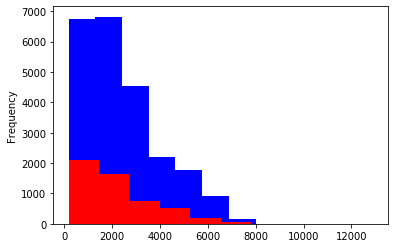

In [313]:
r[r.churn==0]['vintage'].plot.hist(bins=10,color='blue')
r[r.churn==1]['vintage'].plot.hist(bins=10,color='red')

Those customers who has more days vintage are likely to be churned.

In [314]:
r['churn'].value_counts()

0    23122
1     5260
Name: churn, dtype: int64

It is an imbalanced dataset.Let's look at some more features.

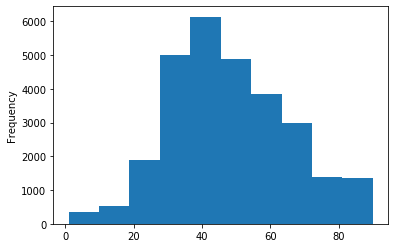

In [315]:
r['age'].plot.hist()

Age is seen to be normally distributed,therefore,converting age into categorical variables.

In [316]:
#for analysis of age dataset
d=r[['age']]

In [317]:
d.head()

,age
0,66
1,35
2,31
3,90
4,42


In [318]:
for i in r['age']:
    if i<18:
        r['age'].replace({i:'Child'},inplace=True)
    elif i>=18 and i<40:
        r['age'].replace({i:'Young'},inplace=True)
    elif i>=40 and i<60:
        r['age'].replace({i:'Middle_Aged'},inplace=True)
    else:
        r['age'].replace({i:'Old'},inplace=True)

In [319]:
r['age'].value_counts()/len(r)

Middle_Aged    0.391481
Young          0.316961
Old            0.263160
Child          0.028398
Name: age, dtype: float64

In [320]:
r=r.drop(columns=['customer_id','branch_code','city'])

In [321]:
r.head()

,vintage,age,gender,dependents,occupation,customer_nw_category,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,3135,Old,Male,0.0,self_employed,2,224.000000,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,310,Young,Male,0.0,self_employed,2,60.000000,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,2356,Young,Male,0.0,salaried,2,69.997814,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,478,Old,Male,0.0,self_employed,2,147.000000,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,2531,Middle_Aged,Male,2.0,self_employed,3,58.000000,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


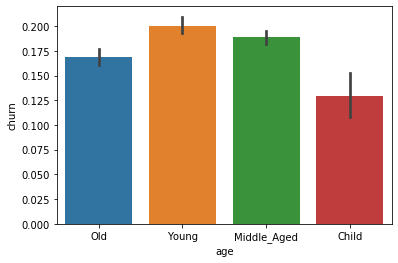

In [322]:
sns.barplot(x='age',y='churn',data=r)

Young customers have the highest probability of churn whereas child customers have minimum probability.

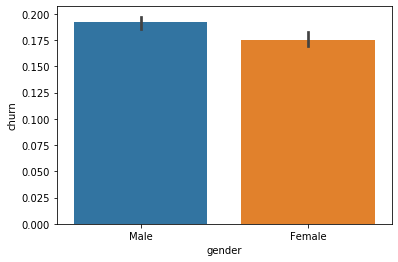

In [323]:
sns.barplot(x='gender',y='churn',data=r)

 Males have the higher probability of churn.

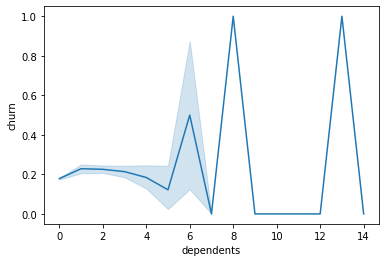

In [324]:
sns.lineplot(x='dependents',y='churn',data=r)

Customers having family of dependents as 8 and 13 have the highest probability of churn.

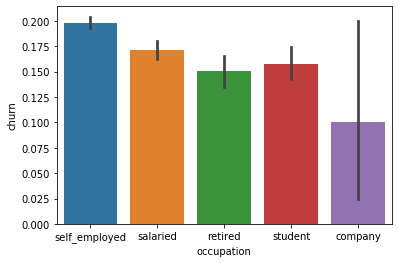

In [325]:
sns.barplot(x='occupation',y='churn',data=r)

Self Employed customers are at maximum risk of churning and companies have the minimum risk.

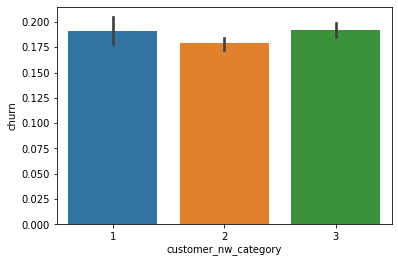

In [326]:
sns.barplot(x='customer_nw_category',y='churn',data=r)

Customers having high net worth and low net worth are almost at same risk of churning whereas customer having medium net worth has the min probability of churn.

# VARIABLE ENCODING

In [327]:
del r['age']

In [328]:
r['age']=d

In [329]:
r.head()

,vintage,gender,dependents,occupation,customer_nw_category,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,age
0,3135,Male,0.0,self_employed,2,224.000000,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,66
1,310,Male,0.0,self_employed,2,60.000000,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,35
2,2356,Male,0.0,salaried,2,69.997814,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,31
3,478,Male,0.0,self_employed,2,147.000000,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,90
4,2531,Male,2.0,self_employed,3,58.000000,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,42


In [330]:
from sklearn.preprocessing import LabelEncoder
j=LabelEncoder()
columns=['gender','occupation']
for h in columns:
    r[h]=j.fit_transform(r[h])

In [331]:
r.head()

,vintage,gender,dependents,occupation,customer_nw_category,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,age
0,3135,1,0.0,3,2,224.000000,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,66
1,310,1,0.0,3,2,60.000000,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,35
2,2356,1,0.0,2,2,69.997814,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,31
3,478,1,0.0,3,2,147.000000,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,90
4,2531,1,2.0,3,3,58.000000,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,42


In [332]:
r['gender'].value_counts()

1    17073
0    11309
Name: gender, dtype: int64

In [333]:
r['occupation'].value_counts()

3    17556
2     6704
4     2058
1     2024
0       40
Name: occupation, dtype: int64

In [334]:
r.columns

Index(['vintage', 'gender', 'dependents', 'occupation', 'customer_nw_category',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn', 'age'],
      dtype='object')

In [335]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts

In [336]:
#Scaling the data
t=MinMaxScaler()
t.fit_transform(r)

array([[0.23232959, 1.        , 0.        , ..., 0.00115812, 0.        ,
        0.73033708],
       [0.01022093, 1.        , 0.        , ..., 0.00243821, 0.        ,
        0.38202247],
       [0.17108263, 1.        , 0.        , ..., 0.00178891, 0.        ,
        0.33707865],
       ...,
       [0.00919884, 1.        , 0.        , ..., 0.01095768, 1.        ,
        0.51685393],
       [0.18908719, 1.        , 0.21428571, ..., 0.00118727, 0.        ,
        0.5505618 ],
       [0.17053227, 1.        , 0.        , ..., 0.00147284, 1.        ,
        0.19101124]])

In [337]:
y=r['churn']
x=r.drop(columns=['churn'],axis=1)

In [338]:
x_train,x_test,y_train,y_test=tts(x,y,stratify=y,test_size=0.2,random_state=4)

Since the dataset is imbalanced we will use random forest to build the model.

In [339]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV

In [340]:
#hyperparameter optimization
dparams={
    'n_estimators':[100,150,250,300,350,190,400],    
    'criterion':['gini','entropy'],
    'max_features':['auto','sqrt','log2',1,2,3],
    'max_depth':[2,3,4,5,6,7,8],
    'min_samples_split':[2,3,4,5,6,7],
    'min_samples_leaf':[1,2,3,4,5,6],
    'class_weight':['balanced','balanced_subsample']
}

In [341]:
d=RandomForestClassifier()

In [342]:
e=RandomizedSearchCV(d,param_distributions=dparams,n_iter=5,n_jobs=-1,cv=5,scoring='roc_auc')
e.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [343]:
y_pred=e.predict(x_test)

In [344]:
y_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [345]:
y_t=e.predict(x_train)

In [346]:
y_t

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [347]:
roc_auc_score(y_train,y_t)

0.8022520762281665

In [348]:
roc_auc_score(y_test,y_pred)

0.752315897646696

In [349]:
joblib.dump(e,'project_f')

['project_f']

In [350]:
model = joblib.load('project_f')
print(model.predict([[3135,1,0,3,2,224,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,35.03,1500.00,1458.71,66]]))

[0]
